In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
train_data = pd.read_csv('/content/train_data.txt', sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [51]:
test_data = pd.read_csv('/content/test_data.txt', sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_data.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [58]:
test_soln_data = pd.read_csv('/content/test_data_solution.txt', sep=':::', names=['Title',' Genre', 'Description'], engine='python')
test_soln_data.head()

,Title,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [53]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [54]:
test_data.describe()

,Id
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [55]:
test_soln_data.describe()

,Title,Genre,Description
count,54200,54200,54200
unique,54200,27,54072
top,Edgar's Lunch (1998),drama,Grammy - music award of the American academy ...
freq,1,13612,10


In [56]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [57]:
test_data.isnull().sum()

Id             0
Title          0
Description    0
dtype: int64

In [59]:
test_soln_data.isnull().sum()

Title          0
 Genre         0
Description    0
dtype: int64

**train_data  Movie Genre**

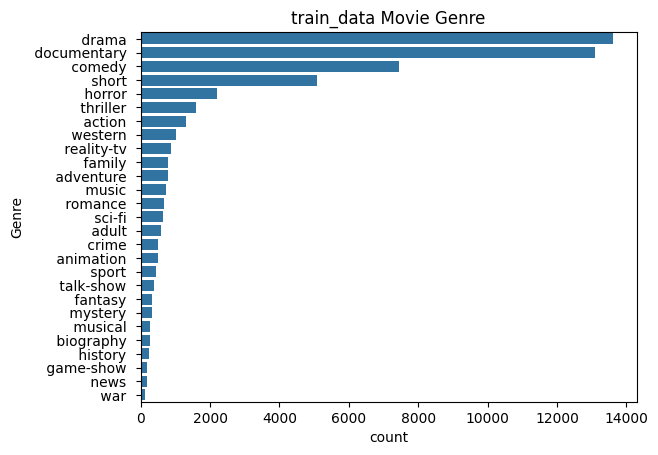

In [60]:
sns.barplot(x=train_data['Genre'].value_counts().values, y=train_data['Genre'].value_counts().index)

plt.title('train_data Movie Genre')
plt.xlabel('count')
plt.ylabel('Genre')

plt.show()

In [61]:
train_data['Genre'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [62]:
!python -m nltk.downloader stopwords

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Text cleaning**

In [64]:
import re
import string
import nltk
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text

train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

**TfidfVectorizer**

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

In [66]:
from sklearn.model_selection import train_test_split
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
y_predict=logmodel.predict(X_val)

In [70]:
from sklearn.metrics import classification_report
classification_report(y_val,y_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'               precision    recall  f1-score   support\n\n      action        0.56      0.22      0.32       263\n       adult        0.82      0.21      0.33       112\n   adventure        0.50      0.11      0.18       139\n   animation        0.67      0.02      0.04       104\n   biography        0.00      0.00      0.00        61\n      comedy        0.53      0.59      0.56      1443\n       crime        0.50      0.01      0.02       107\n documentary        0.65      0.86      0.74      2659\n       drama        0.53      0.81      0.64      2697\n      family        0.50      0.05      0.09       150\n     fantasy        0.00      0.00      0.00        74\n   game-show        0.93      0.35      0.51        40\n     history        0.00      0.00      0.00        45\n      horror        0.68      0.55      0.61       431\n       music        0.69      0.38      0.49       144\n     musical        0.00      0.00      0.00        50\n     mystery        0.00      0.00      0.00 

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val,y_predict)

array([[  58,    0,    0,    0,    0,   18,    1,   37,  122,    0,    0,
           0,    0,    7,    0,    0,    0,    0,    0,    0,    3,    6,
           2,    0,    8,    0,    1],
       [   0,   23,    9,    0,    0,   36,    0,    7,   26,    0,    0,
           0,    0,    2,    0,    0,    0,    0,    0,    0,    0,    8,
           0,    0,    0,    0,    1],
       [   5,    1,   15,    0,    0,   11,    0,   26,   54,    1,    0,
           0,    0,   12,    0,    0,    0,    0,    0,    0,    4,    7,
           0,    0,    2,    0,    1],
       [   1,    0,    0,    2,    0,   27,    0,   21,   30,    4,    0,
           0,    0,    2,    1,    0,    0,    0,    0,    0,    6,   10,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    2,    0,   41,   17,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
           0,    0,    0,    0,    0],
       [   3,    1,    0,    0,    0,  851,    0,   95,  427,    

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,y_predict)

0.5808355621138062

**Naive Bayes**

In [73]:
from sklearn.naive_bayes import MultinomialNB

In [74]:
nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)

MultinomialNB()

In [75]:
y_predict=nb_model.predict(X_val)

In [76]:
from sklearn.metrics import classification_report
classification_report(y_val,y_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'               precision    recall  f1-score   support\n\n      action        0.00      0.00      0.00       263\n       adult        0.00      0.00      0.00       112\n   adventure        0.00      0.00      0.00       139\n   animation        0.00      0.00      0.00       104\n   biography        0.00      0.00      0.00        61\n      comedy        0.61      0.04      0.07      1443\n       crime        0.00      0.00      0.00       107\n documentary        0.54      0.90      0.67      2659\n       drama        0.38      0.88      0.53      2697\n      family        0.00      0.00      0.00       150\n     fantasy        0.00      0.00      0.00        74\n   game-show        0.00      0.00      0.00        40\n     history        0.00      0.00      0.00        45\n      horror        0.00      0.00      0.00       431\n       music        0.00      0.00      0.00       144\n     musical        0.00      0.00      0.00        50\n     mystery        0.00      0.00      0.00 

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val,y_predict)

array([[   0,    0,    0,    0,    0,    0,    0,   58,  205,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1,    0,   10,  101,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1,    0,   42,   96,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,   39,   65,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    2,    0,   39,   20,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,   57,    0,  242, 1144,    

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,y_predict)

0.44526422576777647

In [80]:
test_soln_data.columns

Index(['Title', ' Genre', 'Description'], dtype='object')

**Test_soln_data  Movie  Genre**

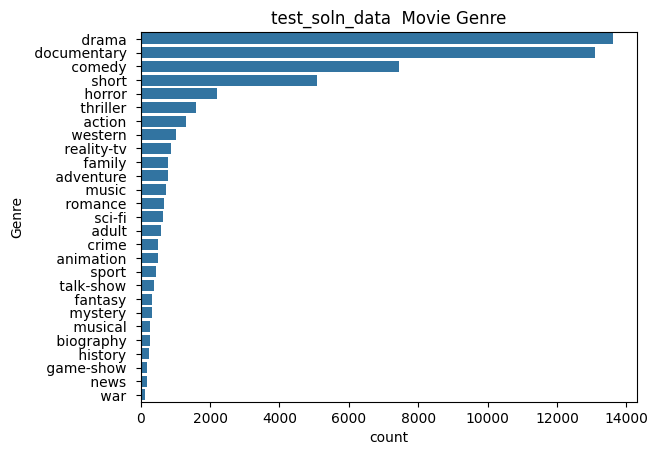

In [81]:
sns.barplot(x=test_soln_data[ ' Genre'].value_counts().values, y=test_soln_data[ ' Genre'].value_counts().index)

plt.title('test_soln_data  Movie Genre')
plt.xlabel('count')
plt.ylabel('Genre')

plt.show()